In [ ]:
!pip install chainer==3.3.0
!pip install matplotlib==2.1.0
!conda install seaborn

  Using cached matplotlib-2.1.0.tar.gz (35.7 MB)
    ERROR: Command errored out with exit status 1:
     command: /Users/user/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/23/3hzsqvdx5g76284p88kgw8dr0000gn/T/pip-install-ifwlvym4/matplotlib_351439b17cfe44e1be2964b4073560e7/setup.py'"'"'; __file__='"'"'/private/var/folders/23/3hzsqvdx5g76284p88kgw8dr0000gn/T/pip-install-ifwlvym4/matplotlib_351439b17cfe44e1be2964b4073560e7/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/23/3hzsqvdx5g76284p88kgw8dr0000gn/T/pip-pip-egg-info-fpeh6swu
         cwd: /private/var/folders/23/3hzsqvdx5g76284p88kgw8dr0000gn/T/pip-install-ifwlvym4/matplotlib_351439b17cfe44e1be2964b4073560e7/
    Complete output (162 lines):
    IMPORTANT WARNING:
        pkg-config is not installed.
        mat

Solving environment: done

## Package Plan ##

  environment location: /Users/user/opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38hecd8cb5_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                               4.10.1-py38hecd8cb5_1 --> 4.10.3-py38hecd8cb5_0


Proceed ([y]/n)? 

In [2]:
pip install scikit-image --upgrade

Note: you may need to restart the kernel to use updated packages.


In [60]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0

In [1]:
import os
from skimage import io

In [2]:
image_path = os.path.join('train', 'train_1.tif')
image = io.imread(image_path)

In [3]:
print(image.shape) #7バンド

(32, 32, 7)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

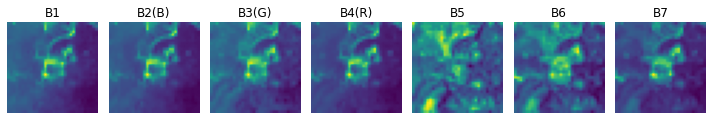

In [5]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=7, figsize=(10,3))

ax0.imshow(image[:,:,0])
ax0.set_title('B1')
ax0.axis('off')
ax0.set_adjustable('box')

ax1.imshow(image[:,:,1])
ax1.set_title('B2(B)')
ax1.axis('off')
ax1.set_adjustable('box')

ax2.imshow(image[:,:,2])
ax2.set_title('B3(G)')
ax2.axis('off')
ax2.set_adjustable('box')

ax3.imshow(image[:,:,3])
ax3.set_title('B4(R)')
ax3.axis('off')
ax3.set_adjustable('box')

ax4.imshow(image[:,:,4])
ax4.set_title('B5')
ax4.axis('off')
ax4.set_adjustable('box')

ax5.imshow(image[:,:,5])
ax5.set_title('B6')
ax5.axis('off')
ax5.set_adjustable('box')

ax6.imshow(image[:,:,6])
ax6.set_title('B7')
ax6.axis('off')
ax6.set_adjustable('box')

fig.tight_layout()
                

In [9]:
!pip install pandas
import pandas as pd
data = pd.read_csv('train_master.tsv', sep='\t')
data.head()

,file_name,flag
0,train_0.tif,0
1,train_1.tif,0
2,train_2.tif,0
3,train_3.tif,0
4,train_4.tif,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296182 entries, 0 to 296181
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   file_name  296182 non-null  object
 1   flag       296182 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ MB


In [7]:
print('正例：',(data['flag'].values ==1).sum())
print('負例：',(data['flag'].values == 0).sum())
print('合計：',data.shape[0])

正例： 12442
負例： 283740
合計： 296182


/Users/user/opt/anaconda3/envs/MARS/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='flag', ylabel='Density'>

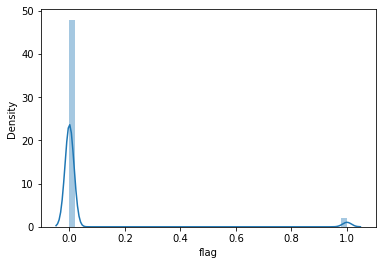

In [8]:
import seaborn as sns
sns.distplot(data['flag'])

In [8]:
from skimage import exposure

In [9]:
image_rescaled = exposure.rescale_intensity(image)

In [10]:
print('最大値:', image.max())
print('最小値:', image.min())

最大値: 23325.0
最小値: 6652.0


In [11]:
print('最大値:', image_rescaled.max())
print('最小値:', image_rescaled.min())

最大値: 1.0
最小値: 0.0


In [12]:
import chainer.functions as F
import chainer.links as L
from chainer import Chain

/Users/user/opt/anaconda3/envs/MARS/lib/python3.6/site-packages/chainer/_environment_check.py:38: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Also note that Chainer does not officially support Mac OS X.
Please use it at your own risk.

  ''')  # NOQA


In [13]:
class CNN(Chain):
    def __init__(self,out_size):
        super(CNN, self).__init__(
                conv1 = L.Convolution2D(None, 32, 3, stride=2),
                conv2 = L.Convolution2D(None, 32, 3, stride=2),
                fc3 = L.Linear(None, 512),
                fc4 = L.Linear(None, out_size))
        self.train = True
        
    def __call__(self, x):
        with chainer.using_config('enable_backprop', self.train):
            h = F.max_pooling_2d(F.relu(self.conv1(x)), 2, stride=2)
            h = F.max_pooling_2d(F.relu(self.conv2(h)), 2, stride=2)
            h = F.relu(self.fc3(h))
            y = self.fc4(h)

            return y

In [14]:
model = CNN(out_size=2)

In [15]:
from tqdm import tqdm_notebook as tqdm
tqdm.monitor_interval = 0

In [16]:
def preprocess(image, mode = 'train'):
    if mode == 'train':
        if image.max() != image.min():
            image = exposure.rescale_intensity(image)
            
    elif mode == 'val':
        if image.max() != image.min():
             image = exposure.rescale_intensity(image)
                
    elif mode == 'test':
        if image.max() != image.min():
             image = exposure.rescale_intensity(image)
    
    else:
        if image.max() != image.min():
             image = exposure.rescale_intensity(image)
                
    return image
        

In [17]:
image.shape

(32, 32, 7)

In [18]:
def generate_minibatch(data_path, minibatch_meta, mode='train'):
    images = []
    if mode == 'train' or mode=='val':
        labels = []
    for data in minibatch_meta.iterrows():
        im_path = os.path.join(data_path, data[1]['file_name'])
        image = io.imread(im_path)
        
        image = preprocess(image, mode=mode)
        image = image.transpose((2,0,1))#(7,32,32)
        
        if mode == 'train' or mode== 'val':
            labels.append(data[1]['flag'])
            
        images.append(image)
       # print(type(images))
        
    images = np.array(images)
   # print(type(images))

    if mode == 'train' or mode == 'val':
        labels = np.array(labels)
        
        return images, labels
    else:
        return images

In [19]:
import numpy as np

In [20]:
def split_data(data, ratio=0.95):
    train_index = np.random.choice(data.index, int(len(data)*ratio), replace=False)#
    val_index = list(set(data.index).difference(set(train_index)))
    train = data.iloc[train_index].copy()
    val = data.iloc[val_index].copy() 
    
    return train, val

In [21]:
def IOU(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    p_true_index = np.where(y_true==1)[0]
    p_pred_index = np.where(y_pred==1)[0]
    union = set(p_true_index).union(set(p_pred_index))
    interection = set(p_true_index).intersection(set(p_pred_index))
    
    if len(union) ==0:
        return 0
    else:
        return len(interection)/len(union)

In [22]:
import chainer
import chainer.cuda as cuda
from chainer import optimizers, serializers

In [27]:
def train_model(model, train, val, data_path, model_name, batch_size=64,init_lr=0.01,num_epochs=30,gpu=False):
    optimizer = optimizers.NesterovAG(lr=init_lr)
    optimizer.setup(model)
    optimizer.add_hook(chainer.optimizer.WeightDecay(0.001))
    
    best_score = 0
    best_th = 0.5
    th_tr = 0.5
    th_val = 0.5
    tr_num_positives = train['flag'].sum()
    val_num_positives = val['flag'].sum()
    
    if gpu:
        model.to_gpu()
    epbar = tqdm(range(num_epochs))
    
    for epoch in epbar:
        epbar.set_description('epoch{}'.format(epoch+1))
        #train
        batch_index = np.random.permutation(np.arange(len(train)) //batch_size)
        train['batch_index'] = batch_index
        num_samples = 0
        count = 0
        train_loss = 0
        train_iou = 0
        tr_proba = np.array([])
        tr_true = np.array([])
        pbar = tqdm(train.groupby('batch_index'), leave=False)
        pbar.set_description('training')
        
        for t in pbar:
            model.cleargrads()
            minibatch, labels = generate_minibatch(data_path, t[1], mode = 'train')
            weight = np.array([sum(labels)/len(labels), 1-sum(labels)/len(labels)]).astype(np.float32)
            minibatch = minibatch.astype(np.float32)
            labels = labels.astype(np.int32)
            if gpu:
                minibatch = cuda.to_gpu(minibatch)
                labels = cuda.to_gpu(labels)
                weight = cuda.to_gpu(weight)
            
            y = model(minibatch)
            loss = F.softmax_cross_entropy(y, labels, class_weight = weight)
            loss.backward()
            optimizer.update()
            y_proba = cuda.to_cpu(F.softmax(y).data)[:,-1]
            y_pred = (y_proba > th_tr).astype(np.int)
            tr_proba = np.concatenate((tr_proba, y_proba))
            labels = cuda.to_cpu(labels)
            tr_true = np.concatenate((tr_true, labels))
            train_loss += float(loss.data)*len(minibatch)
            train_iou += IOU(labels, y_pred)
            num_samples += len(minibatch)
            count += 1
            pbar.set_postfix(IOU=round(train_iou/count,4), loss=round(train_loss/num_samples, 4), th=round(th_tr, 2))
        
        pbar.close()
        train_iou = IOU(tr_true, (tr_proba>th_tr).astype(np.int))
        
        # validation
        val_proba = np.array([])
        val_true = np.array([])
        batch_index = np.random.permutation(np.arange(len(val))//batch_size)
        val['batch_index']=batch_index
        count = 0
        val_iou = 0
        model.train = False
        pbar = tqdm(val.groupby('batch_index'), leave=False)
        pbar.set_description('validating')
        for v in pbar:
            minibatch, labels = generate_minibatch(data_path, v[1], mode = 'val')
            minibatch = minibatch.astype(np.float32)
            labels = labels.astype(np.int32)
            if gpu:
                minibatch = cuda.to_gpu(minibatch)
            y = model(minibatch)
            y_proba = cuda.to_cpu(F.softmax(y).data)[:,-1]
            y_pred = (y_proba > th_val).astype(np.int)
            val_proba = np.concatenate((val_proba, y_proba))
            val_true = np.concatenate((val_true, labels))
            count+=1
            val_iou += IOU(labels, y_pred)
            pbar.set_postfix(IOU=round(val_iou/count, 4), th=round(th_val, 2))
        pbar.close()
        val_iou = IOU(val_true, (val_proba>th_val).astype(np.int))
        
        
        tr_proba.sort()
        th_tr = tr_proba[-tr_num_positives]
        val_proba.sort()
        th_val = val_proba[-val_num_positives]

        if best_score <= val_iou:
            best_score = val_iou
            best_th = th_val
            serializers.save_npz(model_name.split('.')[0]+'_best.npz', model)
        serializers.save_npz(model_name, model)
        epbar.write('[epoch {}] train_iou:{}  val_iou:{}  best_iou:{}  best_th:{}'.format(epoch+1, round(train_iou,4), round(val_iou,4),
                                                                                          round(best_score,4), round(best_th,4)))
        
        model.train = True

    print('best IOU:', best_score, 'best threshold:', best_th)
    return model

In [28]:
data_path = 'train'
train, val = split_data(data, ratio=0.95)

print('-'*20, 'train', '-'*20)
print('number of samples:', len(train))
print('number of positives', train['flag'].sum())
print('number of negatives:', (1-train['flag']).sum())
print('-'*47)


print('-'*20, 'val', '-'*20)
print('number of samples:', len(val))
print('number of positives', val['flag'].sum())
print('number of negatives:', (1-val['flag']).sum())
print('-'*47)


-------------------- train --------------------
number of samples: 281372
number of positives 11851
number of negatives: 269521
-----------------------------------------------
-------------------- val --------------------
number of samples: 14810
number of positives 591
number of negatives: 14219
-----------------------------------------------


In [29]:
model_name = 'CNN.nzp'
model = train_model(model, train, val, data_path, model_name, num_epochs=5)

/Users/user/opt/anaconda3/envs/MARS/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/5 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/envs/MARS/lib/python3.6/site-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/4397 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/envs/MARS/lib/python3.6/site-packages/ipykernel_launcher.py:68: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/232 [00:00<?, ?it/s]

[epoch 1] train_iou:0.1297  val_iou:0.1126  best_iou:0.1126  best_th:0.8721


  0%|          | 0/4397 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

[epoch 2] train_iou:0.212  val_iou:0.2178  best_iou:0.2178  best_th:0.8509


  0%|          | 0/4397 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

[epoch 3] train_iou:0.2428  val_iou:0.2289  best_iou:0.2289  best_th:0.7885


  0%|          | 0/4397 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

[epoch 4] train_iou:0.2575  val_iou:0.1893  best_iou:0.2289  best_th:0.7885


  0%|          | 0/4397 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

[epoch 5] train_iou:0.26  val_iou:0.1161  best_iou:0.2289  best_th:0.7885
best IOU: 0.22886297376093295 best threshold: 0.7885205149650574


In [35]:
def predict(model, data_path, mode='test', batchsize=128, gpu=False, threshold=0.5):
    data = pd.DataFrame()
    data['file_name'] = os.listdir(data_path)
    predictions = np.array([])
    model.train = False
    if gpu:
        model.to_gpu()
    data['batch']=np.arange(len(data))//batchsize
    for t in tqdm(data.groupby('batch')):
        minibatch = generate_minibatch(data_path, t[1], mode = mode)
        minibatch = minibatch.astype(np.float32)
        if gpu:
            minibatch = cuda.to_gpu(minibatch)
        y = model(minibatch)
        y_proba = cuda.to_cpu(F.softmax(y).data)[:,-1]
        y_pred = (y_proba>threshold).astype(np.int)
        predictions = np.concatenate((predictions, y_pred))
    data['prediction'] = predictions
    del data['batch']
    
    return data
    

In [36]:
# 評価用データが格納されているディレクトリを指定し、閾値を0.9に設定する
data_path = 'test'
threshold = 0.9

# 学習済みのモデルをロードする
model = CNN(out_size=2)
model_name = 'CNN_best.npz'
serializers.load_npz(model_name, model)

# 予測結果を出力する
submit = predict(model, data_path, threshold=threshold)

/Users/user/opt/anaconda3/envs/MARS/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/729 [00:00<?, ?it/s]

In [37]:
submit[['file_name', 'prediction']].to_csv('submit.tsv', sep='\t', header=None, index=None)